In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.linalg import eigh, svd
from scipy import exp
import time
import glob
import PIL
import imageio
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import linalg
import numpy as np
layers = tf.keras.layers
import os
import cv2
from IPython.display import clear_output
from sklearn.externals import joblib 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from itertools import cycle, islice
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import MinMaxScaler, StandardScaler
colors = np.array(list(islice(cycle(["#377eb8", "#ff7f00", "#4daf4a",
                                                 "#f781bf", "#a65628", "#984ea3",
                                                 "#999999", "#e41a1c", "#dede00"]),
                                          int(20 + 1))))

C:\Users\ilida\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)

In [3]:
from IPython.display import clear_output

In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import pickle

In [6]:
class Model:
    K_after_transformation = []
    age = []
    smile= []
    gender_is_men = []
    beard= []
    ids =[]
    eigvals =[]
    def __init__(self,name):
        self.Name = name
        

In [7]:
model = pickle.load(open(r"Model_SKPCA_Liniowy.p", "rb") )

In [8]:
K_trans = pickle.load(open(r"K_trans_Model_SKPCA_Liniowy.p", "rb") )
K_after_transformation_test = pickle.load(open(r"K_after_transformation_test_Model_SKPCA_Liniowy.p", "rb") )
data_scaler = pickle.load(open(r"data_scaler_Model_SKPCA_Liniowy.p", "rb") )

In [9]:
cof = pickle.load(open(r"cof_Model_SKPCA_Liniowy.p", "rb") )

In [10]:
class Decoder(tf.keras.Model):
    def __init__(self):
        super(Decoder,self).__init__()
        self.model = None
        
    def call(self,input_feature):
        return self.model.call(input_feature)
    
    def summary(self):
        return self.model.summary()
    
    def load(self):
        self.model = tf.keras.models.load_model("decoder_cae_relu_caleb_16_01.h5")

In [11]:
decoder = Decoder()
decoder.load()

In [12]:
temp = [8060]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



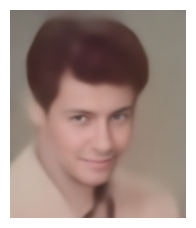

In [13]:
dekomposed = K_trans[temp,:].dot(cof)
temp2_unscaled = data_scaler.inverse_transform(dekomposed)
my_dpi = 100

for ww in range(0,dekomposed.shape[0],5):
    predictions = decoder(temp2_unscaled[ww:ww+5,:])

    for i in range(0,predictions.shape[0]):
        image= predictions[i]
        fig = plt.figure(figsize=(176/my_dpi, 208/my_dpi), dpi=my_dpi)
        plt.imshow(image)
        plt.axis('off')
        plt.gca().set_axis_off()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                    hspace = 0, wspace = 0)
        plt.margins(0,0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())    

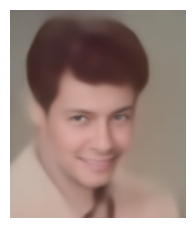

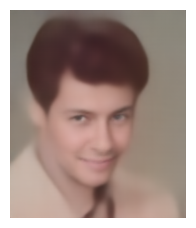

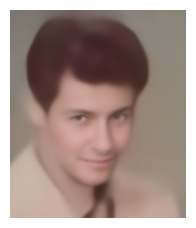

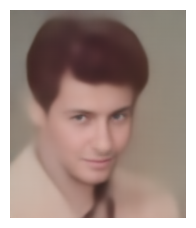

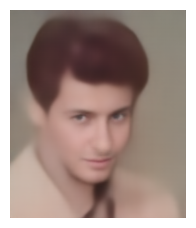

In [14]:
name = "smile"
vec_number = 1

min_value = min(K_trans[:,vec_number])
max_value = max(K_trans[:,vec_number])

K_trans_copy = np.copy(K_trans[temp,:])
id_of_image_lvl = 0


for lvl in np.linspace(min_value, max_value, num=5):
    K_trans_copy[:,vec_number] = lvl
    dekomposed = K_trans_copy.dot(cof)
    temp2_unscaled = data_scaler.inverse_transform(dekomposed)
    my_dpi = 100
    for ww in range(0,K_trans_copy.shape[0],5):
        predictions = decoder(temp2_unscaled[ww:ww+5,:])

        for i in range(0,predictions.shape[0]):
            image= predictions[i]
            fig = plt.figure(figsize=(176/my_dpi, 208/my_dpi), dpi=my_dpi)
            plt.imshow(image)
            plt.axis('off')
            plt.gca().set_axis_off()
            plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                        hspace = 0, wspace = 0)
            plt.margins(0,0)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            clear_output()
    id_of_image_lvl = id_of_image_lvl+1


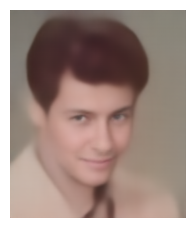

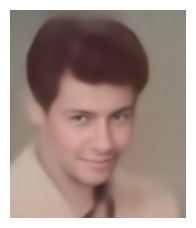

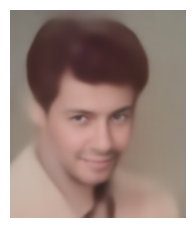

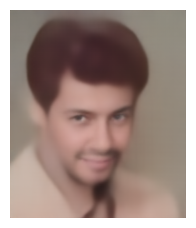

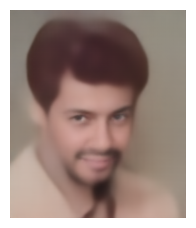

In [15]:
name = "beard"
vec_number = 2

min_value = min(K_trans[:,vec_number])
max_value = max(K_trans[:,vec_number])

K_trans_copy = np.copy(K_trans[temp,:])
id_of_image_lvl = 0


for lvl in np.linspace(min_value, max_value, num=5):
    K_trans_copy[:,vec_number] = lvl
    dekomposed = K_trans_copy.dot(cof)
    temp2_unscaled = data_scaler.inverse_transform(dekomposed)
    my_dpi = 100
    for ww in range(0,K_trans_copy.shape[0],5):
        predictions = decoder(temp2_unscaled[ww:ww+5,:])

        for i in range(0,predictions.shape[0]):
            image= predictions[i]
            fig = plt.figure(figsize=(176/my_dpi, 208/my_dpi), dpi=my_dpi)
            plt.imshow(image)
            plt.axis('off')
            plt.gca().set_axis_off()
            plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                        hspace = 0, wspace = 0)
            plt.margins(0,0)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            clear_output()
    id_of_image_lvl = id_of_image_lvl+1
